<a href="https://colab.research.google.com/github/jhou27/NLP_with_Python/blob/main/BIO_IOB_Tagged_Text_to_Original_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tree import Tree
from nltk.chunk import conlltags2tree

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
tokens = ['In', 'Beirut', ',', 'a', 'string', 'of', 'officials',
          'voiced', 'their', 'anger', ',', 'while', 'at',
          'the', 'United', 'Nations', 'summit', 'in', 'New', 
          'York', ',', 'Prime', 'Minister', 'Fouad', 'Siniora',
          'said', 'the', 'Lebanese', 'people', 'are', 'resolute',
          'in', 'preventing', 'such', 'attempts', 'from',
          'destroying', 'their', 'spirit', '.']

In [3]:
tags = ['O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 
        'O', 'O', 'O', 'O', 'B-org', 'I-org', 'O', 'O', 'B-geo', 
        'I-geo', 'O', 'B-per', 'O', 'B-per', 'I-per', 'O', 'O', 
        'B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 
        'O', 'O', 'O']

In [8]:
# tag each token with pos
pos_tags = [pos for token, pos in pos_tag(tokens)]

In [10]:
# convert the BIO / IOB tags to tree
conlltags = [(token, pos, tg) for token, pos, tg in zip(tokens, pos_tags, tags)]

In [16]:
conlltags

[('In', 'IN', 'O'),
 ('Beirut', 'NNP', 'B-geo'),
 (',', ',', 'O'),
 ('a', 'DT', 'O'),
 ('string', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('officials', 'NNS', 'O'),
 ('voiced', 'VBD', 'O'),
 ('their', 'PRP$', 'O'),
 ('anger', 'NN', 'O'),
 (',', ',', 'O'),
 ('while', 'IN', 'O'),
 ('at', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('United', 'NNP', 'B-org'),
 ('Nations', 'NNP', 'I-org'),
 ('summit', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('New', 'NNP', 'B-geo'),
 ('York', 'NNP', 'I-geo'),
 (',', ',', 'O'),
 ('Prime', 'NNP', 'B-per'),
 ('Minister', 'NNP', 'O'),
 ('Fouad', 'NNP', 'B-per'),
 ('Siniora', 'NNP', 'I-per'),
 ('said', 'VBD', 'O'),
 ('the', 'DT', 'O'),
 ('Lebanese', 'JJ', 'B-gpe'),
 ('people', 'NNS', 'O'),
 ('are', 'VBP', 'O'),
 ('resolute', 'JJ', 'O'),
 ('in', 'IN', 'O'),
 ('preventing', 'VBG', 'O'),
 ('such', 'JJ', 'O'),
 ('attempts', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('destroying', 'VBG', 'O'),
 ('their', 'PRP$', 'O'),
 ('spirit', 'NN', 'O'),
 ('.', '.', 'O')]

In [12]:
ne_tree = conlltags2tree(conlltags)

In [14]:
pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 4.3 MB/s 


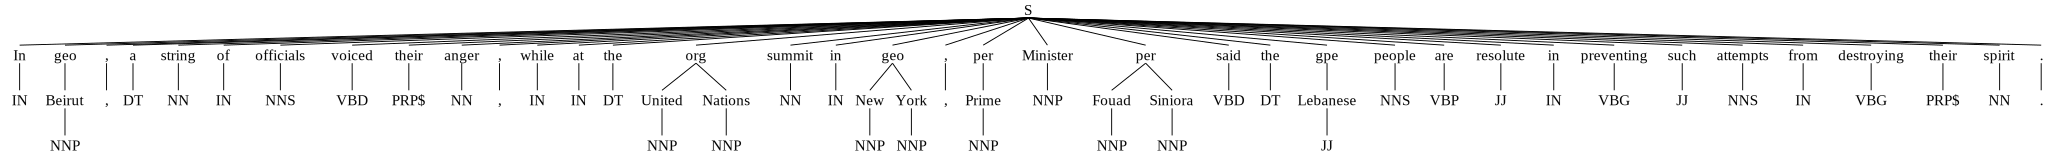

In [15]:
ne_tree

In [27]:
for subtree in ne_tree:
    print(subtree)

('In', 'IN')
(geo Beirut/NNP)
(',', ',')
('a', 'DT')
('string', 'NN')
('of', 'IN')
('officials', 'NNS')
('voiced', 'VBD')
('their', 'PRP$')
('anger', 'NN')
(',', ',')
('while', 'IN')
('at', 'IN')
('the', 'DT')
(org United/NNP Nations/NNP)
('summit', 'NN')
('in', 'IN')
(geo New/NNP York/NNP)
(',', ',')
(per Prime/NNP)
('Minister', 'NNP')
(per Fouad/NNP Siniora/NNP)
('said', 'VBD')
('the', 'DT')
(gpe Lebanese/JJ)
('people', 'NNS')
('are', 'VBP')
('resolute', 'JJ')
('in', 'IN')
('preventing', 'VBG')
('such', 'JJ')
('attempts', 'NNS')
('from', 'IN')
('destroying', 'VBG')
('their', 'PRP$')
('spirit', 'NN')
('.', '.')


In [29]:
for subtree in ne_tree:
  if type(subtree) == Tree:
    print(subtree)

(geo Beirut/NNP)
(org United/NNP Nations/NNP)
(geo New/NNP York/NNP)
(per Prime/NNP)
(per Fouad/NNP Siniora/NNP)
(gpe Lebanese/JJ)


In [30]:
for subtree in ne_tree:
  if type(subtree) == Tree:
    print(subtree.leaves())

[('Beirut', 'NNP')]
[('United', 'NNP'), ('Nations', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Prime', 'NNP')]
[('Fouad', 'NNP'), ('Siniora', 'NNP')]
[('Lebanese', 'JJ')]


In [31]:
# parse the tree to get our original text
original_text = []
for subtree in ne_tree:
    # checking for 'O' tags
    if type(subtree) == Tree:
        original_label = subtree.label()
        original_string = " ".join([token for token, pos in subtree.leaves()])
        original_text.append((original_string, original_label))
print(original_text)

[('Beirut', 'geo'), ('United Nations', 'org'), ('New York', 'geo'), ('Prime', 'per'), ('Fouad Siniora', 'per'), ('Lebanese', 'gpe')]
